In [8]:
# 导入数据和模型
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()
print(cancer.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [9]:
# 切分数据集
X_train,X_test,y_train,y_test=train_test_split(cancer.data, cancer.target,
stratify=cancer.target,random_state=42)
print(X_train.shape,X_test.shape)

(426, 30) (143, 30)


In [2]:
# 创建决策树分类器
clf=DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
print("训练集上的准确度：{:.3f}".format(clf.score(X_train,y_train)))
print("测试集上的准确度：{:.3f}".format(clf.score(X_test,y_test)))

训练集上的准确度：1.000
测试集上的准确度：0.937


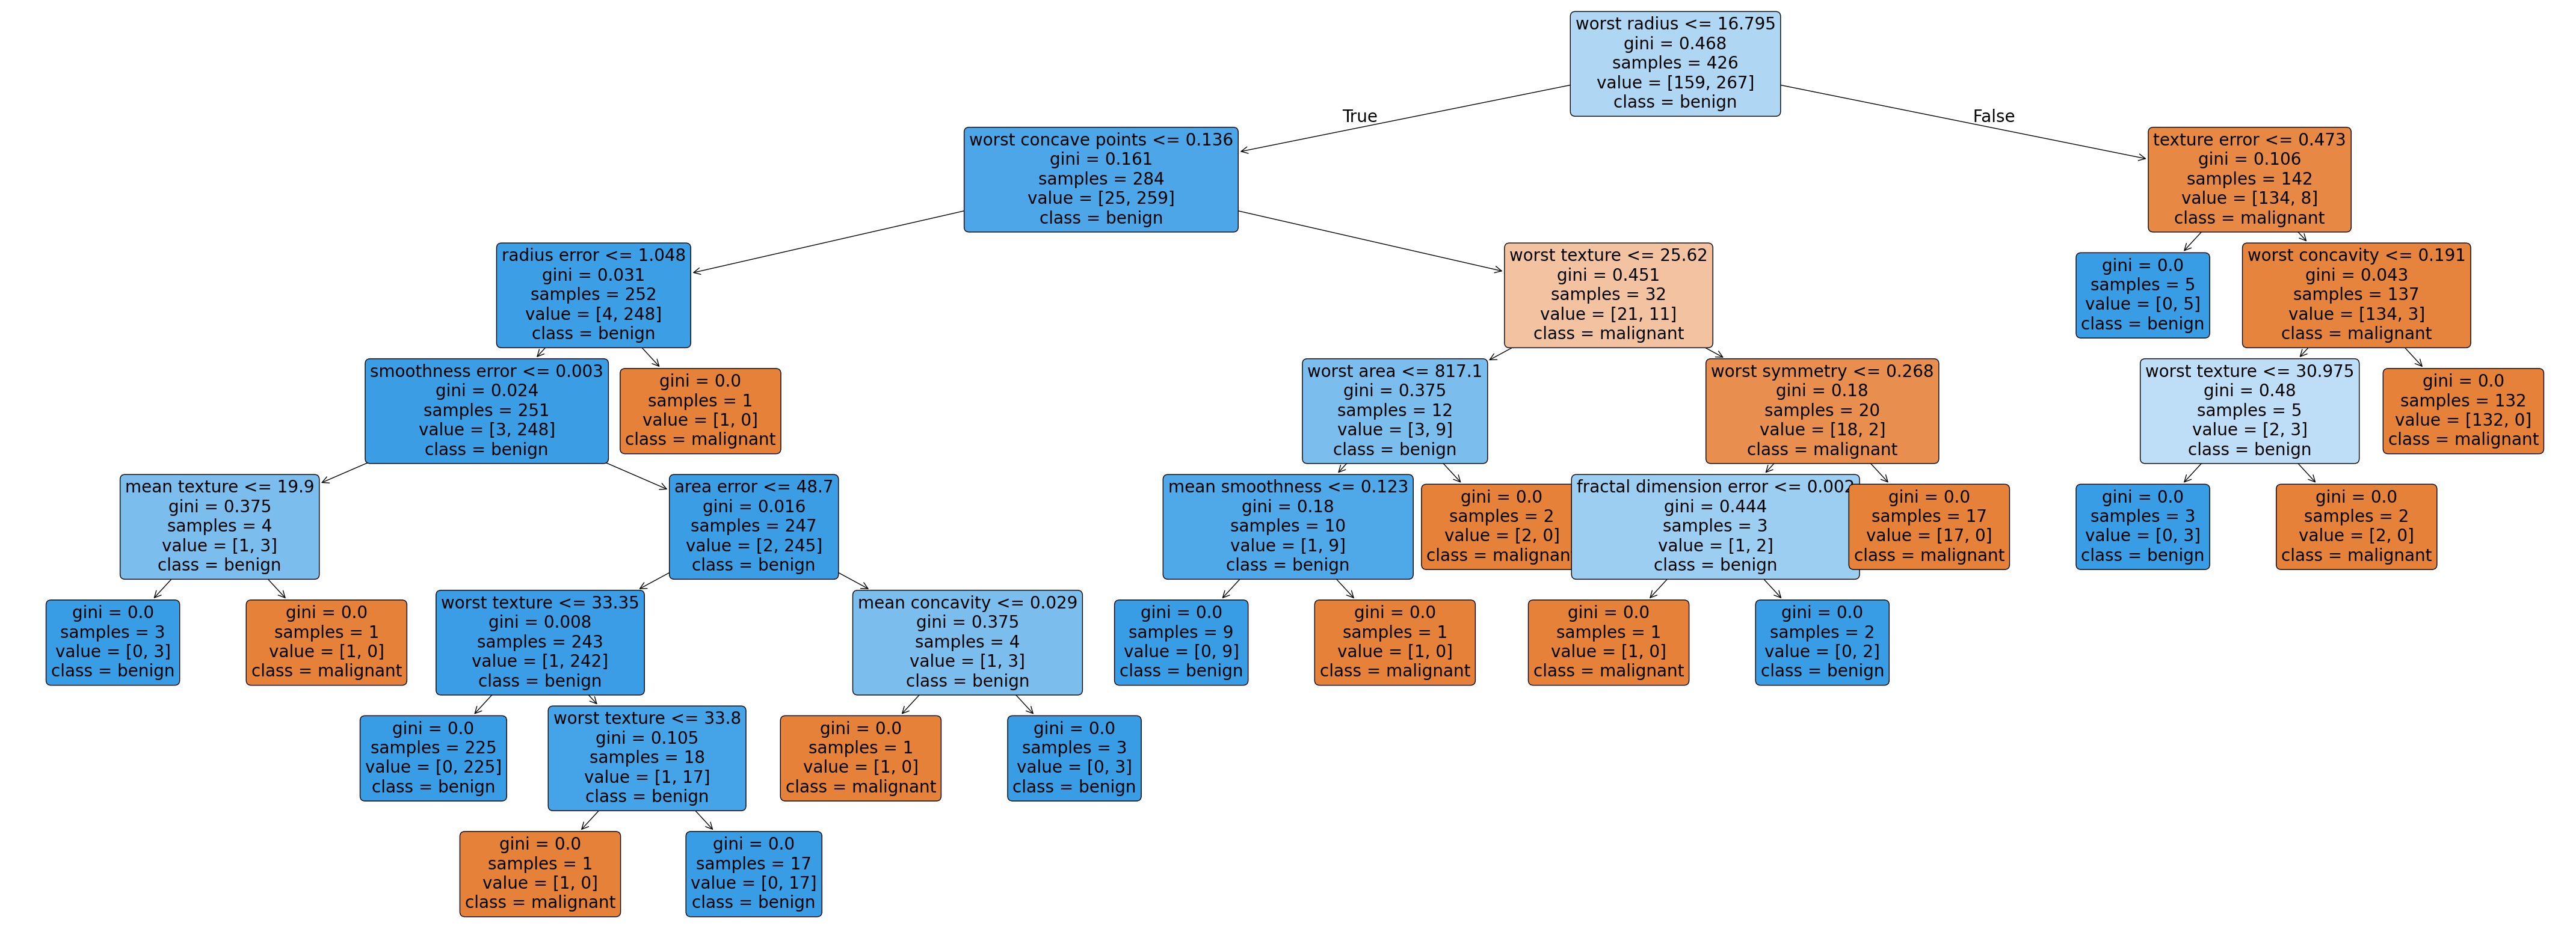

In [3]:
# 绘制决策树
import matplotlib.pyplot as plt
plt.figure(figsize=(55,20))
plot_tree(clf,filled=True,rounded=True,feature_names=cancer.feature_names,
class_names=cancer.target_names, fontsize=20)
plt.show()

In [4]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0) #设置max_depth=4，限制树的最大深度
tree.fit(X_train,y_train)
print("剪枝后训练集上的准确度：{:.3f}".format(tree.score(X_train,y_train)))
print("剪枝后测试集上的准确度：{:.3f}".format(tree.score(X_test,y_test)))

剪枝后训练集上的准确度：0.988
剪枝后测试集上的准确度：0.951


In [5]:
print("Feature importances:\n{}".format(tree.feature_importances_))


Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


Text(0, 0.5, 'Feature')

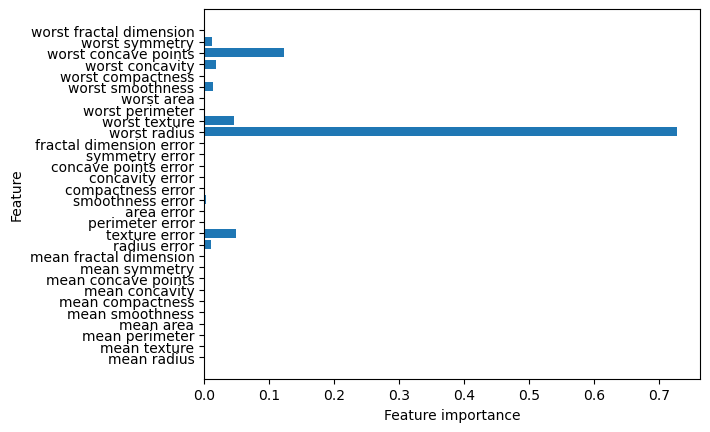

In [6]:
#将特征重要性可视化
import matplotlib.pyplot as plt
import numpy as np
n_features=cancer.data.shape[1] #特征数目
# 用于绘制水平条形图：
plt.barh(range(n_features),tree.feature_importances_,align='center')   # 得到数量，评分，位置居中
# 用于设置y轴的刻度标签
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")